In [16]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
data_merged = pd.merge(city_data, ride_data, on="city", how="left") 
data_merged.head()

# Display the data table for preview


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [26]:
#Average Fare ($) Per City
average_fare = data_merged.groupby("city")["fare"].mean()
average_fare = pd.DataFrame(average_fare).reset_index()
average_fare = average_fare.rename(columns = {"city": "City", "fare": "Average Fare", })
average_fare.head()

,City,Average Fare
0,Amandaburgh,24.641667
1,Barajasview,25.332273
2,Barronchester,36.422500
3,Bethanyland,32.956111
4,Bradshawfurt,40.064000


In [29]:
#Total Number of Rides Per City
total_rides = data_merged.groupby("city")["ride_id"].count()
total_rides = pd.DataFrame(total_rides).reset_index()
total_rides = total_rides.rename(columns = {"city": "City", "ride_id": "Total Rides"})
total_rides.head()

,City,Total Rides
0,Amandaburgh,18
1,Barajasview,22
2,Barronchester,16
3,Bethanyland,18
4,Bradshawfurt,10


In [51]:
#Total Number of Drivers Per City
total_drivers = data_merged[["city", "driver_count"]].drop_duplicates("city")
total_drivers = total_drivers.rename(columns = {"city": "City", "driver_count": "Total Drivers"})
total_drivers.head()

,City,Total Drivers
0,Richardfort,38
28,Williamsstad,59
51,Port Angela,67
70,Rodneyfort,34
93,West Robert,39


In [75]:
#City Type (Urban, Suburban, Rural)

city_type = data_merged[["city", "type"]].drop_duplicates("city")
city_type = city_type.rename(columns = {"city": "City", "type": "City Type"})
city_type.head()

,City,City Type
0,Richardfort,Urban
28,Williamsstad,Urban
51,Port Angela,Urban
70,Rodneyfort,Urban
93,West Robert,Urban


In [73]:
#urban = city_types.get_group("Urban")
#suburban = city_types.get_group("Suburban")
#rural = city_types.get_group("Rural")

## Bubble Plot of Ride Sharing Data

In [81]:
#Create final DataFrame to work with
#merged_df1 = pd.merge(average_fare, total_rides, on ="City")
#merged_df2 = pd.merge(merged_df1, total_drivers, on = "City")
#final_df = pd.merge(merged_df2, city_type, on = "City")
#final_df.head()

In [83]:
#Create final DF to work with
merged_df1 = pd.merge(city_type, total_rides, on ="City")
merged_df2 = pd.merge(merged_df1, average_fare, on = "City")
final_df = pd.merge(merged_df2, total_drivers, on = "City")
final_df.head()

,City,City Type,Total Rides,Average Fare,Total Drivers
0,Richardfort,Urban,28,22.373214,38
1,Williamsstad,Urban,23,24.362174,59
2,Port Angela,Urban,19,23.836842,67
3,Rodneyfort,Urban,23,28.616957,34
4,West Robert,Urban,31,25.123871,39


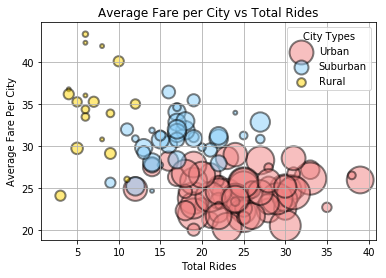

In [95]:

#Urban
urban = final_df.loc[final_df["City Type"]== "Urban"]

#suburban
suburban = final_df.loc[final_df["City Type"]== "Suburban"]

#rural
rural = final_df.loc[final_df["City Type"]== "Rural"]

# Obtain the x and y coordinates for each of the three city types

#Build scatter plots for each city types
#Urban
plt.scatter(urban["Total Rides"], urban["Average Fare"], color = "lightcoral", 
            edgecolors="black", s = urban["Total Drivers"]*15, label = "Urban", 
            alpha = 0.5, linewidth = 2)

#Suburban
plt.scatter(suburban["Total Rides"], suburban["Average Fare"], color = "lightskyblue", 
            edgecolors ="black", s = suburban["Total Drivers"]*15, label = "Suburban", 
            alpha = 0.5, linewidth = 2)

#Rural
plt.scatter(rural["Total Rides"], rural["Average Fare"], color = "gold", 
            edgecolors = "black", s = rural["Total Drivers"]*15, label = "Rural", 
            alpha = 0.5, linewidth = 2)


#Add title, x axis label and y axis label.
plt.title("Average Fare per City vs Total Rides")
plt.xlabel("Total Rides")
plt.ylabel("Average Fare Per City")

# Create a legend
plt.legend(title = 'City Types')

#Other formatting (grid)
plt.grid(True)
plt.show()


In [ ]:
# Incorporate a text label regarding circle size?



# % Total Fares by City Type

In [104]:
# Calculate City Type Total Fares and Percents
total_fares = data_merged["fare"].sum()
urban_fares = data_merged.loc[data_merged["type"] == "Urban", "fare"].sum()
suburban_fares = data_merged.loc[data_merged["type"] == "Suburban", "fare"].sum()
rural_fares = data_merged.loc[data_merged["type"] == "Rural", "fare"].sum()

percent_urban_fares = round(urban_fares/total_fares, 2) *100
percent_suburban_fares = round(suburban_fares/total_fares, 2) *100
percent_rural_fares = round(rural_fares/total_fares, 2) *100


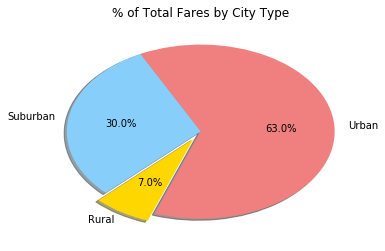

In [115]:
# Build Pie Chart

# Pie chart
labels = 'Urban', 'Suburban', 'Rural'
sizes = [percent_urban_fares, percent_suburban_fares, percent_rural_fares]
explode = (0, 0, 0.1)  


fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=250, colors = ["lightcoral", "lightskyblue", "gold"])
  
plt.title("% of Total Fares by City Type")

plt.show()

## Total Rides by City Type

Text(0.5,1,'% Total Rides by City Type')

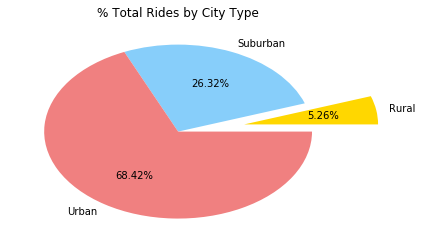

In [124]:
# Calculate Total Rides 
#combined_total_rides = len(data_merged)
city_rides_pie = data_merged.groupby(["type"])["ride_id"].count()
city_rides_pie

city_rides_pie.index
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.5,0,0)
plt.pie(city_rides_pie, labels = city_rides_pie.index, autopct = "%1.2f%%", colors = colors, explode = explode,)

plt.title("% Total Rides by City Type")
# Save Figure


## Total Drivers by City Type

In [136]:
citytype_drivers_pie = data_merged.groupby(["type"])["driver_count"].mean()
citytype_drivers_pie



type
Rural        4.296000
Suburban    13.712000
Urban       36.678154
Name: driver_count, dtype: float64

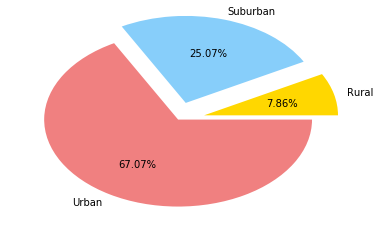

In [142]:
#create pie chart
citytype_drivers_pie.index

#Set the colors of each section of the pie chart.
colors = ["gold", "lightskyblue", "lightcoral"]

#explode the first and second segments of the pie chart.
explode = (0.2,0.2,0)
plt.pie(citytype_drivers_pie, labels = citytype_drivers_pie.index, autopct = "%1.2f%%", colors = colors, explode = explode)
plt.show()

In [127]:
# Show Figure
plt.show()

ANALYSIS:

Urban cities had the greatest number of rides, the highest number of drivers and the lowest average fares
of the three city types

Rural areas had the lowest number of rides, lowest number of drivers, and lowest percentage of total fares

